# An introduction to Pytorch

Pytorch is a platform for deep learning in Python/C++. In this lecture we will focus in the Python landscape. 

It provides tools for efficiently creating, training, testing and analyzing neural networks:

* Different types of layers (embedding, linear, convolutional, recurrent)
* Activation functions (tanh, relu, sigmoid, etc.)
* Gradient computation
* Optimizer (adam, adagrad, RMSprop, SGD, etc.)
* Implementations speed gains in GPU

## Tensors

Let's start with some basics: tensors are similar to numpy arrays

In [45]:
import numpy as np
import torch

np.random.seed(0)
torch.manual_seed(0)

In [3]:
v1 = np.arange(10)
v2 = np.arange(10, 20)

print("v1: %s\n" % v1)
print("v2: %s\n" % v2)
print("Dot product: %d" % v1.dot(v2))

v1: [0 1 2 3 4 5 6 7 8 9]

v2: [10 11 12 13 14 15 16 17 18 19]

Dot product: 735


In [7]:
v1 = torch.arange(10)
v2 = torch.arange(10, 20)

print("v1: %s\n" % v1)
print("v2: %s\n" % v2)
print("Dot product: %d" % v1.dot(v2))

v1: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

v2: tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Dot product: 735


#### Setting values manually or randomly:

In [8]:
v3 = np.array([2, 4, 6, 8])
v4 = np.random.random(10)

print("v3: %s\n" % v3)
print("v4: %s\n" % v4)

v3: [2 4 6 8]

v4: [0.72639872 0.73935424 0.68015035 0.47352003 0.45043365 0.71525855
 0.18119405 0.1819192  0.9227315  0.67426907]



In [9]:
v3 = torch.tensor([2, 4, 6, 8])
v4 = torch.rand(10)

print("v3: %s\n" % v3)
print("v4: %s\n" % v4)

v3: tensor([2, 4, 6, 8])

v4: tensor([0.8405, 0.6914, 0.0403, 0.7377, 0.3544, 0.5140, 0.4915, 0.1579, 0.4751,
        0.7653])



#### You can also change a value inside the array manually

In [10]:
v4[1] = 0.1
print(v4)

tensor([0.8405, 0.1000, 0.0403, 0.7377, 0.3544, 0.5140, 0.4915, 0.1579, 0.4751,
        0.7653])


#### Accessing values (indexing)

Individual tensor positions are scalars, or 0-dimension tensor:

In [11]:
v1 = torch.arange(10)

In [12]:
print(v1[0])
print(v1[0].shape)

tensor(0)
torch.Size([])


`.item()` returns a Python number:

In [13]:
number = v1[0].item()
print(number)
print(isinstance(number, int))

0
True


## Converting

In [14]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [15]:
# torch --> numpy
B = A.numpy()
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [16]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

## Elementwise operations

In [17]:
v1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
v2

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [19]:
v1 + v2

tensor([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [20]:
v1 * v2

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

Some caveats when working with integer values!

In [21]:
v1 / v2 

RuntimeError: Integer division of tensors using div or / is no longer supported, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

In [23]:
x = v1.float()
y = v2.float()
x / y

tensor([0.0000, 0.0909, 0.1667, 0.2308, 0.2857, 0.3333, 0.3750, 0.4118, 0.4444,
        0.4737])

#### Operations with constants

In [24]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [25]:
x + 1

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [26]:
x ** 2

tensor([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

#### Matrices

In [27]:
m1 = torch.rand(5, 4)
m2 = torch.rand(4, 5)

print("m1: %s\n" % m1)
print("m2: %s\n" % m2)
print(m1.dot(m2))

m1: tensor([[0.7911, 0.7790, 0.3392, 0.1068],
        [0.8816, 0.0246, 0.8745, 0.9065],
        [0.5135, 0.7818, 0.1493, 0.4424],
        [0.0682, 0.0821, 0.3905, 0.4508],
        [0.6486, 0.0946, 0.3196, 0.8485]])

m2: tensor([[0.2707, 0.4952, 0.7372, 0.4750, 0.1376],
        [0.8742, 0.8034, 0.6029, 0.8402, 0.8754],
        [0.3132, 0.6785, 0.7391, 0.8908, 0.3854],
        [0.1835, 0.9370, 0.7891, 0.0467, 0.4983]])



RuntimeError: 1D tensors expected, got 2D, 2D tensors at ../aten/src/TH/generic/THTensorEvenMoreMath.cpp:83

Oops... that can be misleading if you are used to numpy. Instead, call `mm`

In [28]:
print(m1.mm(m2))

tensor([[1.0210, 1.3478, 1.3878, 1.3374, 0.9747],
        [0.7003, 1.8990, 2.0262, 1.2607, 0.9315],
        [0.9505, 1.3983, 1.3094, 1.0544, 1.0331],
        [0.2952, 0.7871, 0.7441, 0.4703, 0.4564],
        [0.5140, 1.4091, 1.4409, 0.7118, 0.7180]])


In [29]:
print(m1 @ m2)

tensor([[1.0210, 1.3478, 1.3878, 1.3374, 0.9747],
        [0.7003, 1.8990, 2.0262, 1.2607, 0.9315],
        [0.9505, 1.3983, 1.3094, 1.0544, 1.0331],
        [0.2952, 0.7871, 0.7441, 0.4703, 0.4564],
        [0.5140, 1.4091, 1.4409, 0.7118, 0.7180]])


What if I have batched data? It's better to use `.bmm()`! This is a common source of errors.

In [30]:
m1 = torch.rand(2, 5, 4)
m2 = torch.rand(2, 4, 5)

print(m1.bmm(m2))

tensor([[[1.3949, 1.0731, 1.3313, 0.8972, 1.3460],
         [1.1715, 0.9119, 1.2318, 0.5970, 1.1741],
         [0.6570, 0.4586, 0.6742, 0.7064, 0.8182],
         [0.7295, 0.5646, 0.8505, 1.0040, 1.1814],
         [1.0063, 0.5420, 0.8679, 0.7967, 0.8066]],

        [[0.5311, 0.6051, 0.5187, 0.2731, 0.2563],
         [0.8225, 0.7501, 0.7612, 0.4548, 0.3712],
         [0.9531, 0.5223, 0.5775, 0.3952, 0.3753],
         [1.1869, 0.7789, 0.7322, 0.5213, 0.5131],
         [0.5715, 0.3806, 0.2838, 0.2202, 0.2585]]])


`@` will work as `.bmm()`!

In [31]:
print(m1 @ m2)

tensor([[[1.3949, 1.0731, 1.3313, 0.8972, 1.3460],
         [1.1715, 0.9119, 1.2318, 0.5970, 1.1741],
         [0.6570, 0.4586, 0.6742, 0.7064, 0.8182],
         [0.7295, 0.5646, 0.8505, 1.0040, 1.1814],
         [1.0063, 0.5420, 0.8679, 0.7967, 0.8066]],

        [[0.5311, 0.6051, 0.5187, 0.2731, 0.2563],
         [0.8225, 0.7501, 0.7612, 0.4548, 0.3712],
         [0.9531, 0.5223, 0.5775, 0.3952, 0.3753],
         [1.1869, 0.7789, 0.7322, 0.5213, 0.5131],
         [0.5715, 0.3806, 0.2838, 0.2202, 0.2585]]])


What if I have even more dimensions?

In [32]:
m1 = torch.rand(2, 3, 5, 4)
m2 = torch.rand(2, 3, 4, 5)

print(m1.bmm(m2))

RuntimeError: Expected 3-dimensional tensor, but got 4-dimensional tensor for argument #1 'batch1' (while checking arguments for bmm)

`.bmm` works with 3d tensors. We can use the more general `matmul` instead. In fact, the `@` operator is a shorthand for `matmul`.

In [38]:
print(m1.matmul(m2).shape)
print(m1.matmul(m2))

torch.Size([2, 3, 5, 5])
tensor([[[[1.5123, 1.6268, 1.8535, 2.1311, 1.3917],
          [1.0503, 0.6726, 1.0155, 1.1335, 0.8117],
          [0.6293, 0.2779, 0.4590, 0.5317, 0.4186],
          [1.0184, 1.3185, 1.3476, 1.5560, 1.0910],
          [0.5591, 0.5152, 0.7758, 0.8843, 0.3094]],

         [[1.2068, 1.1475, 1.1560, 1.0750, 1.2943],
          [0.3632, 0.5753, 0.4025, 0.2080, 0.4787],
          [0.9171, 0.6348, 0.6151, 0.6738, 0.9318],
          [0.6193, 1.8378, 1.1507, 0.9540, 1.1438],
          [0.7270, 1.4191, 1.0204, 1.2311, 1.0825]],

         [[1.4094, 1.1296, 0.6805, 1.5907, 1.6366],
          [0.4048, 0.2806, 0.2585, 0.4226, 0.2137],
          [1.1688, 0.9231, 0.6348, 1.2367, 0.9975],
          [0.8251, 0.5466, 0.5144, 1.2760, 0.8789],
          [0.8575, 0.6042, 0.4822, 1.4390, 1.2007]]],


        [[[0.7810, 0.5242, 0.5863, 1.0640, 0.7554],
          [0.7935, 0.1950, 0.5598, 0.4831, 0.3593],
          [1.6333, 0.8133, 1.2474, 1.7215, 1.1238],
          [0.8468, 0.6065, 0.22

Anoter option is to use the powerful `einsum` function. Let's say our input have the following representation:
- `b` = batch size 
- `c` = channels
- `i` = `m1` timesteps
- `j` = `m2` timesteps
- `d` = hidden size

In [41]:
torch.einsum('bcid,bcdj->bcij', m1, m2)

tensor([[[[1.5123, 1.6268, 1.8535, 2.1311, 1.3917],
          [1.0503, 0.6726, 1.0155, 1.1335, 0.8117],
          [0.6293, 0.2779, 0.4590, 0.5317, 0.4186],
          [1.0184, 1.3185, 1.3476, 1.5560, 1.0910],
          [0.5591, 0.5152, 0.7758, 0.8843, 0.3094]],

         [[1.2068, 1.1475, 1.1560, 1.0750, 1.2943],
          [0.3632, 0.5753, 0.4025, 0.2080, 0.4787],
          [0.9171, 0.6348, 0.6151, 0.6738, 0.9318],
          [0.6193, 1.8378, 1.1507, 0.9540, 1.1438],
          [0.7270, 1.4191, 1.0204, 1.2311, 1.0825]],

         [[1.4094, 1.1296, 0.6805, 1.5907, 1.6366],
          [0.4048, 0.2806, 0.2585, 0.4226, 0.2137],
          [1.1688, 0.9231, 0.6348, 1.2367, 0.9975],
          [0.8251, 0.5466, 0.5144, 1.2760, 0.8789],
          [0.8575, 0.6042, 0.4822, 1.4390, 1.2007]]],


        [[[0.7810, 0.5242, 0.5863, 1.0640, 0.7554],
          [0.7935, 0.1950, 0.5598, 0.4831, 0.3593],
          [1.6333, 0.8133, 1.2474, 1.7215, 1.1238],
          [0.8468, 0.6065, 0.2264, 1.4667, 0.7630],
    

See more about `einsum` here: https://pytorch.org/docs/master/generated/torch.einsum.html#torch.einsum

## Broadcasting

Broadcasting means doing some arithmetic operation with tensors of different ranks, as if the smaller one were expanded, or broadcast, to match the larger.

Let's experiment with a matrix (rank 2 tensor) and a vector (rank 1).

In [46]:
m = torch.rand(5, 4)
v = torch.arange(4)

In [47]:
print("m:", m)
print()
print("v:", v)
print()

m: tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939, 0.5185],
        [0.6977, 0.8000, 0.1610, 0.2823]])

v: tensor([0, 1, 2, 3])



In [49]:
m_plus_v = m + v
print("m + v:\n", m_plus_v)

m + v:
 tensor([[0.4963, 1.7682, 2.0885, 3.1320],
        [0.3074, 1.6341, 2.4901, 3.8964],
        [0.4556, 1.6323, 2.3489, 3.4017],
        [0.0223, 1.1689, 2.2939, 3.5185],
        [0.6977, 1.8000, 2.1610, 3.2823]])


Proof check

In [50]:
print("m[0] = %s\n" % m[0])
print("v = %s\n" % v)

row_sum = m[0] + v
print("m[0] + v = %s\n" % row_sum)
print("(m + v)[0] = %s" % m_plus_v[0])

m[0] = tensor([0.4963, 0.7682, 0.0885, 0.1320])

v = tensor([0, 1, 2, 3])

m[0] + v = tensor([0.4963, 1.7682, 2.0885, 3.1320])

(m + v)[0] = tensor([0.4963, 1.7682, 2.0885, 3.1320])


We can also reshape tensors

In [51]:
v.shape

torch.Size([4])

In [52]:
v

tensor([0, 1, 2, 3])

In [53]:
v = v.view(2, 2)
v

tensor([[0, 1],
        [2, 3]])

In [54]:
v = v.view(4, 1)
v

tensor([[0],
        [1],
        [2],
        [3]])

Note that shape `[4, 1]` is not broadcastable to match `[5, 4]`!

In [55]:
m + v

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 0

... but `[1, 4]` is!

In [56]:
v = v.view(1, 4)
m + v

tensor([[0.4963, 1.7682, 2.0885, 3.1320],
        [0.3074, 1.6341, 2.4901, 3.8964],
        [0.4556, 1.6323, 2.3489, 3.4017],
        [0.0223, 1.1689, 2.2939, 3.5185],
        [0.6977, 1.8000, 2.1610, 3.2823]])

### General Broadcast Semantics

See more here: https://pytorch.org/docs/master/notes/broadcasting.html

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [62]:
x = torch.rand(5,7,3)
y = torch.rand(5,7,3)
z = x + y
# same shapes are always broadcastable (i.e. the above rules always hold)

In [66]:
x = torch.rand((0,))
y = torch.rand(2,2)
z = x + y
# x and y are not broadcastable, because x does not have at least 1 dimension

RuntimeError: The size of tensor a (0) must match the size of tensor b (2) at non-singleton dimension 1

In [68]:
# can line up trailing dimensions
x = torch.empty(5,3,4,1)
y = torch.empty(  3,1,1)
z = x + y
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

In [69]:
# but:
x = torch.empty(5,2,4,1)
y = torch.empty(  3,1,1)
z = x + y
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

Always take care with tensor shapes! It is a good practice to verify in the interpreter how some expression is evaluated before inserting into your model code. 

In other words, **you can use pytorch's dynamic graph creation ability to debug your model by printing tensor shapes!**

## Useful Functions

Pytorch (and other libraries) have many functions that operate on tensors. Let's try some of them and plot the results.

In [71]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pl

Create a vector x with values from -10 to 10, and intervals of 0.1.

In [72]:
x = torch.arange(-10, 10, 0.1, dtype=torch.float)

In [73]:
x.shape

torch.Size([200])

The `.numpy()` method converts Pytorch tensors to numpy array. It is necessary to plot with matplotlib.

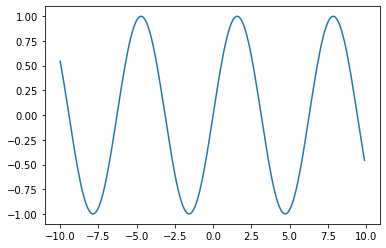

In [74]:
y = x.sin()
pl.plot(x.numpy(), y.numpy())

Hyperbolic tangent

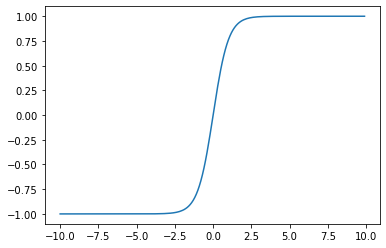

In [75]:
y = x.tanh()
pl.plot(x.numpy(), y.numpy())

$e^x$ 

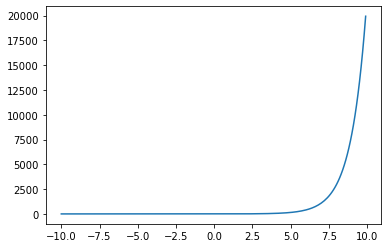

In [76]:
y = x.exp()
pl.plot(x.numpy(), y.numpy())

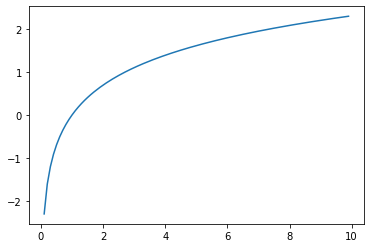

In [77]:
y = torch.log(x)
pl.plot(x.numpy(), y.numpy())

# But what about GPUs?
How do I use A GPU?

In [79]:
my_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_device

device(type='cpu')

If you have a GPU you should get something like: 
`device(type='cuda', index=0)`

In [88]:
# you can initialize a tensor in a specfic device
torch.ones(5, device=my_device)

tensor([1., 1., 1., 1., 1.])

In [91]:
# you can move data to the GPU by doing .to(device)
data = torch.eye(3)  # data is on the cpu 
data.to(my_device)  # data is moved to my_device

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Now the computation happens on the GPU.

In [83]:
res = data + data
res

tensor([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]])

In [87]:
# you can get a tensor's device via the .device attribute
res.device

device(type='cpu')

# Automatic differentiation with `autograd`

Central to all neural networks in PyTorch is the `autograd` package. 

We can say that it is the _true_ power behind PyTorch. The autograd package provides automatic differentiation for all operations on Tensors. It is a **define-by-run** framework, which means that your backprop is defined by how your code is run, and that **every single iteration can be different**.

Refs:
- https://pytorch.org/docs/stable/autograd.html
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

`torch.Tensor` is the central class of the package. If you set its attribute `.requires_grad` as `True`, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute.

In [140]:
x = torch.tensor(2.)
print(x)

tensor(2.)


In [156]:
# setting requires_grad in directly via tensor's constructor
x = torch.tensor(2., requires_grad=True)

# or by setting .requires_grad attribute
# you can do this at any moment to track operations on x
x.requires_grad = True  

print(x)

tensor(2., requires_grad=True)


In [157]:
print(x.requires_grad)
print(x.grad)  # no gradient yet

True
None


In [158]:
# let's perform a simple operation on x
y = x ** 2

print("Grad of x:", x.grad)

Grad of x: None


In [159]:
# if you want to compute the derivatives, you can call .backward() on a Tensor
y.backward()
print("Grad of y with respect to x:", x.grad)

Grad of y with respect to x: tensor(4.)


To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.

In [179]:
x = torch.tensor(2., requires_grad=True)
print(x)

y = x ** 2
print(y)

c = y.detach()  # c will be treated as a constant! c has the same contents as y but requires_grad=False
print(c)

z = c * y.exp()  
print(z)

z.backward()
print(x.grad)

tensor(2., requires_grad=True)
tensor(4., grad_fn=<PowBackward0>)
tensor(4.)
tensor(218.3926, grad_fn=<MulBackward0>)
tensor(873.5704)


To prevent tracking history (and using memory), you can also wrap the code block in with `torch.no_grad()`:. This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don’t need the gradients.

In [177]:
x = torch.tensor(2.)
x.requires_grad = True
print('x:', x)

y = x ** 2
print('y:', y)

with torch.no_grad():
    y = 2 * y
    print('x:', x)  # Try to think why x.requires_grad is True
    print('y:', y)

x: tensor(2., requires_grad=True)
y: tensor(4., grad_fn=<PowBackward0>)
x: tensor(2., requires_grad=True)
y: tensor(8.)


There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a `.grad_fn` attribute that references a `Function` that has created the `Tensor` (except for `Tensor`s created by the user - their `grad_fn` is `None`).

====> Let's go back and see the `grad_fn` in our previous examples.

If you still don't believe autograd works, here's something that I think will change your mind --- we're going to compute the derivative of an unnecessarily complicated function:

$$ y(x) = \sum_{x_i} e^{0.001 x_i^2} + \sin(x_i^3) \cdot \log(x_i)$$

In [137]:
def complicated_func(X):
    return torch.sum(torch.exp(0.001 * X ** 2) + torch.sin(X ** 3) * torch.log(X))

In [138]:
x = torch.arange(1, 10, 0.1, dtype=torch.float, requires_grad=True)
x

tensor([1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000, 4.5000,
        4.6000, 4.7000, 4.8000, 4.9000, 5.0000, 5.1000, 5.2000, 5.3000, 5.4000,
        5.5000, 5.6000, 5.7000, 5.8000, 5.9000, 6.0000, 6.1000, 6.2000, 6.3000,
        6.4000, 6.5000, 6.6000, 6.7000, 6.8000, 6.9000, 7.0000, 7.1000, 7.2000,
        7.3000, 7.4000, 7.5000, 7.6000, 7.7000, 7.8000, 7.9000, 8.0000, 8.1000,
        8.2000, 8.3000, 8.4000, 8.5000, 8.6000, 8.7000, 8.8000, 8.9000, 9.0000,
        9.1000, 9.2000, 9.3000, 9.4000, 9.5000, 9.6000, 9.7000, 9.8000, 9.9000],
       requires_grad=True)

In [139]:
y = complicated_func(x)
y.backward()

In [135]:
x.grad

tensor([ 8.4347e-01,  9.6745e-01,  7.0215e-01, -1.5371e-01, -1.5448e+00,
        -2.8139e+00, -2.5935e+00,  3.4371e-01,  4.9029e+00,  6.1208e+00,
        -7.1154e-01, -9.6026e+00, -4.3225e+00,  1.2014e+01,  5.0618e+00,
        -1.7083e+01,  5.3129e+00,  1.4884e+01, -2.4178e+01,  1.9542e+01,
        -8.3407e+00, -2.0807e+00,  8.0647e+00, -7.7079e+00, -1.1458e+00,
         2.0335e+01, -4.4317e+01,  4.9858e+01, -6.3655e+00, -5.7770e+01,
         2.6313e+01,  6.9782e+01,  1.9344e+01, -4.6108e+01, -8.0576e+01,
        -9.1352e+01, -9.6715e+01, -1.0142e+02, -8.7320e+01, -1.8511e+01,
         9.4970e+01,  9.7035e+01, -9.6455e+01, -4.8176e+01,  1.3684e+02,
        -1.5338e+02,  1.5415e+02, -1.6741e+02,  1.6771e+02, -7.1524e+01,
        -1.3881e+02,  1.4273e+02,  1.9093e+02,  6.2615e+01, -4.0747e+01,
        -6.2126e+01,  9.7839e+00,  1.7279e+02,  2.5614e+02, -5.8047e+01,
        -2.4144e+02,  2.8856e+02, -2.5302e+02,  2.7245e+02, -3.2850e+02,
         2.1105e+02,  2.3265e+02, -1.9564e+02, -3.6

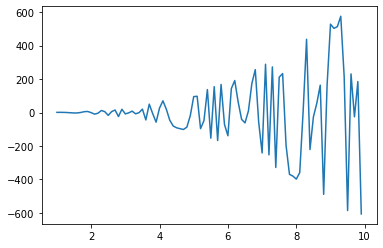

In [134]:
pl.plot(x.detach(), x.grad.detach())

### Concepts not covered in this lecture

PyTorch's `autograd` is a very powerfull tool. For instance, it can calculate the Jacobian and Hessian of any given function! Here is a list of more advanced things that you can accomplish with `autograd`:

- Vector-Jacobian products for non-scalar outputs (e.g. when `y` is a vector)
- Compute Jacobian and Hessian
- Retain the computation graph (useful for inspecting gradients inside a model)
- Sparse gradients
- Register and remove hooks (useful for saving gradients)
- How to set up user-designed `Function`s properly
- Numerical gradient checking


More info: pytorch.org/docs/stable/autograd.html

### The interaction of `autograd` with `nn.Module`s and `nn.Parameters`

In the next notebook we will see how to build a linear regression model using PyTorch's `nn.Module`. You will see that you don't need to worry about gradients when using `nn.Module` and `nn.Parameter`. This is because they automatically keep track of gradients for you.

In [181]:
# w.x + b
lin = torch.nn.Linear(2, 1, bias=True)  # nn.Linear is a nn.Module
lin.weight  # lin.weight is a nn.Parameter!

Parameter containing:
tensor([[-0.2067, -0.4198]], requires_grad=True)

In [125]:
type(lin.weight)

torch.nn.parameter.Parameter

**Exercise:**

Derive the gradient $$\frac{\partial y}{\partial x}$$ and make a function that computes it. Check that it gives the same as `x.grad`.